In [14]:
%load_ext autoreload
%autoreload 2
import random
from subprocess import call

# tell jupyter notebook to show plots inline (with output)
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats.distributions import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# tell whiny modules to shut up about it 
warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore", module="statsmodels")

import netgen as ng

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [531]:
ng.configureSweep(popscale=0.5, arkipallidal=1, SNrExtEff=[6])

1

In [532]:
ng.compileAndRunSweep(1,0,1)

In [533]:
results = ng.readAllTrialResults(1,0,1)

In [516]:
results[0][0]['SNrExtEff']

6

In [463]:
delays = []
for df in frames:
    delays.append(ng.findOutputs(results[0][0])['decision made']['delay'])
delays

[0.998077392578125]

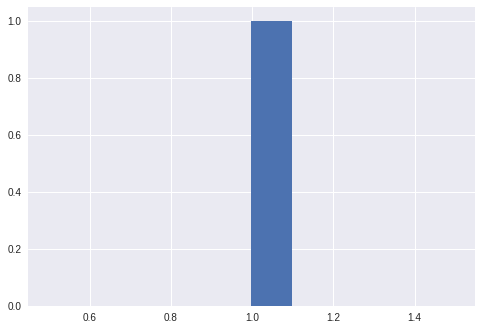

In [464]:
reactions = pd.Series(delays)
reactions.hist()
plt.savefig('/home/mclapp/RTS.png')

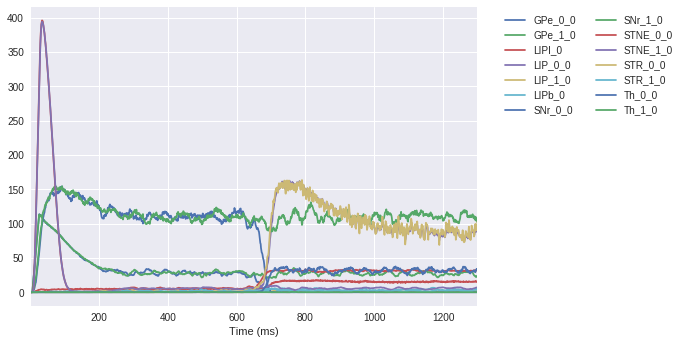

In [534]:
results[0][0]['popfreqs'].plot(x='Time (ms)')
# _ = plt.legend(fontsize=13)
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 1),
          ncol=2, fancybox=True, shadow=True)

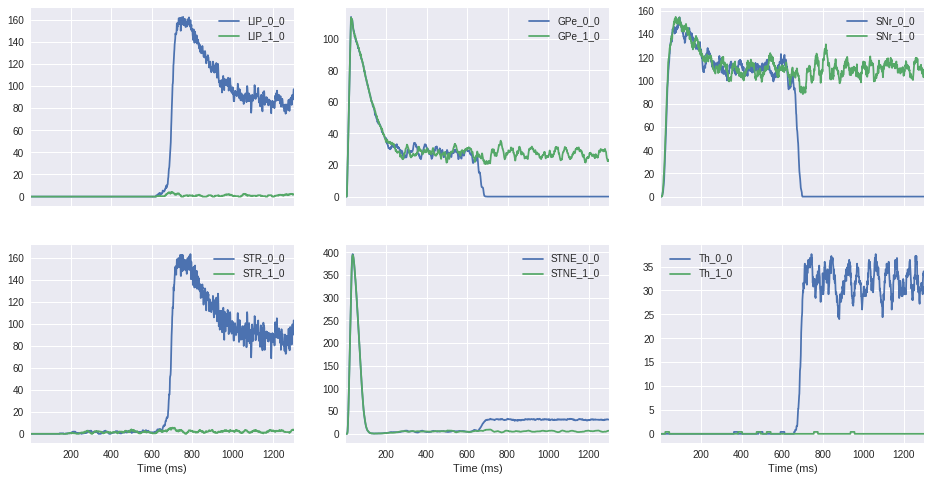

In [535]:
f, (ax1, ax2) = plt.subplots(2, 3, figsize=(16,8), sharex=True)
result = results[0][0]
for i in range(0,result['dims']['choices']):
    result['popfreqs'].plot(x='Time (ms)', y='LIP_'+str(i)+'_0', ax=ax1[0])
    result['popfreqs'].plot(x='Time (ms)', y='GPe_'+str(i)+'_0', ax=ax1[1])
    result['popfreqs'].plot(x='Time (ms)', y='SNr_'+str(i)+'_0', ax=ax1[2])
    result['popfreqs'].plot(x='Time (ms)', y='STR_'+str(i)+'_0', ax=ax2[0])
    result['popfreqs'].plot(x='Time (ms)', y='STNE_'+str(i)+'_0', ax=ax2[1])
    result['popfreqs'].plot(x='Time (ms)', y='Th_'+str(i)+'_0', ax=ax2[2])

        
plt.savefig('/home/mclapp/firing_rates.png')

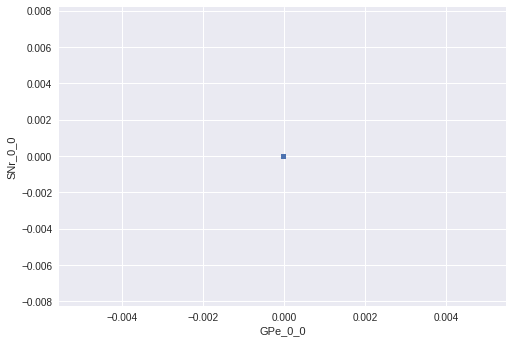

In [458]:
results[0][0]['popfreqs'].plot(x='GPe_0_0', y='SNr_0_0', kind='scatter')